In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()

In [2]:
raw_data=pd.read_csv('TrainAndValid/TrainAndValid.csv')

C:\Users\21652\AppData\Local\Temp\ipykernel_20604\3812177401.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data=pd.read_csv('TrainAndValid/TrainAndValid.csv')


### Exploratory data analysics (EDA)

In [3]:
# In this section we discover the raw data by getteing info about features ....

In [4]:
raw_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
raw_data.columns.values

array(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter',
       'UsageBand', 'saledate', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks',
       'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper',
       'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler',
       'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting',
       'Blade_Type', 'Travel_Controls', 'Differential_Type',
       'Steering_Controls'], dtype=object)

In [7]:
data_copy=raw_data.copy()

In [8]:
#add datatime parameters for saledate column

In [9]:
data_copy['saledate'] = pd.to_datetime(data_copy['saledate'])
data_copy['saleYear'] = data_copy.saledate.dt.year
data_copy['saleMonth']=data_copy.saledate.dt.month
data_copy['saleDay']=data_copy.saledate.dt.day
data_copy['saleDayOfWeek']=data_copy.saledate.dt.dayofweek
data_copy['saleDayOfYear']=data_copy.saledate.dt.dayofyear

In [10]:
data_copy.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
#after doing that let's drop the saledate column
data_copy.drop('saledate', axis=1, inplace=True)

In [12]:
data_copy.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# Handeling missing values

In [13]:
#showing the percentage of missing data for each feature
data_copy.isna().sum()/len(data_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [14]:
#Finding the columns that contains strings 
for label, content in data_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [15]:
for label, content in data_copy.items():
    if content.dtype == 'O':  # Check if dtype is object (typically used for strings)
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [16]:
#converting strings to pandas catagory
for label, content in data_copy.items():
    if content.dtype == 'O':
        data_copy[label]=content.astype('category').cat.as_ordered()

In [17]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [18]:
#showing the features that has numeric values
for label , content in data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [19]:
#filling the missing numeric rows with the median
for label , content in data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary colmun which tells us if data was missing 
            data_copy[label+'_is_missing']= pd.isnull(content)
            # fill missing numeric values with median
            data_copy[label]= content.fillna(content.mean())

In [20]:
# checking to see how many examples were missing 
data_copy.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

## filling the categorical data

In [21]:
# chech for columns which are not numeric 
for label , content in data_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
# trurning the catogorical into numbers and fill missing 
for label , content in data_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary colmun to indicate whether sampling is missing or not
        data_copy[label+'_is_missing']=pd.isnull(content)
        # turn category to numbers
        data_copy[label]= pd.Categorical(content).codes+1

In [23]:
data_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### 2 Modeling

In [32]:
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()
#instantiate model 
model = RandomForestRegressor(n_jobs=1, random_state=42)
# fit the model
model.fit(data_copy.drop('SalePrice', axis=1), data_copy['SalePrice'])
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

Execution time: 1294.81640458107 seconds


In [ ]:
#score of the model 
model.score(data_copy.drop('SalePrice', axis=1), data_copy['SalePrice'])

In [24]:
# splitting the data between training and validation data
data_val=data_copy[data_copy.saleYear==2012]
data_train=data_copy[data_copy.saleYear!= 2012]

In [26]:
#splittin it into X and y
X_train, y_train = data_train.drop('SalePrice', axis=1), data_train.SalePrice
X_valid,y_val = data_val.drop('SalePrice', axis=1), data_val.SalePrice

In [27]:
X_train.shape, X_valid.shape

((401125, 102), (11573, 102))

### building an evaluation function

In [28]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_test, y_preds):
    """
    calculates root mean squared log errror between predection and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
# create function to evaluate model on a few differnt levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
    'Valid MAE': mean_absolute_error(y_val, val_preds),
    'Training RMSLE': rmsle(y_train, train_preds),
    'valid RMSLE' : rmsle (y_val, val_preds),
    'R-squared for training' : r2_score(y_train,train_preds),
    'R-squared for validation': r2_score(y_val, val_preds) }
    return scores
    

In [29]:
## testing our model on a subset(to tune the paremeters)
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()
#instantiate model 
model = RandomForestRegressor(n_jobs=1, random_state=42, max_samples=10000)
# fit the model
model.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

Execution time: 87.8079764842987 seconds


In [30]:
show_scores(model)

{'Training MAE': 5555.248091717043,
 'Valid MAE': 7168.1977775857595,
 'Training RMSLE': 0.2575631888418188,
 'valid RMSLE': 0.2937596206786651,
 'R-squared for training': 0.8607826966640917,
 'R-squared for validation': 0.8319787855734462}

### training the model using the best hyperparameters

In [32]:
ideal_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=1,
                                   min_samples_split=14,
                                    n_jobs=-1,
                                    max_samples=None
                                   )
#fit the model 
ideal_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=14, n_estimators=40, n_jobs=-1)

In [33]:
#score of the ideal model trained on all of the data
show_scores(ideal_model)

{'Training MAE': 2832.4210005943464,
 'Valid MAE': 6138.86289156081,
 'Training RMSLE': 0.13971353060664674,
 'valid RMSLE': 0.2537850630474429,
 'R-squared for training': 0.9613669894338022,
 'R-squared for validation': 0.8718807456719054}

In [34]:
#scores of the rs_model trained only on 10000 samples of the data
show_scores(model)

{'Training MAE': 5555.248091717043,
 'Valid MAE': 7168.1977775857595,
 'Training RMSLE': 0.2575631888418188,
 'valid RMSLE': 0.2937596206786651,
 'R-squared for training': 0.8607826966640917,
 'R-squared for validation': 0.8319787855734462}

## making predection on the test data

In [44]:
# importing the testing data
df_test=pd.read_csv('Test (1).csv', low_memory=False, parse_dates=['saledate'])

In [45]:
df_test.head(2)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [46]:
### prerprocessing the data for testing

In [57]:
def preprocess_data(df):
    """ perform some of processing of the given data frame"""
    
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth']=df.saledate.dt.month
    df['saleDay']=df.saledate.dt.day
    df['saleDayOfWeek']=df.saledate.dt.dayofweek
    df['saleDayOfYear']=df.saledate.dt.dayofyear

    df.drop('saledate', axis=1, inplace=True)

  # fill the numeric rows with median

    for label , content in df.items():
       if pd.api.types.is_numeric_dtype(content):
           if pd.isnull(content).sum():
            # add a binary colmun which tells us if data was missing 
              df[label+'_is_missing']= pd.isnull(content)
            # fill missing numeric values with median
              df[label]= content.fillna(content.mean())
  # fil the categorical rows and 
       if not pd.api.types.is_numeric_dtype(content):
          df[label+'_is_missing']= pd.isnull(content)
          # we add +1 to the category code because pandas encodes missing as -1
          df[label] = pd.Categorical(content).codes+1
          
    return df
    
    

In [58]:
#process the test data
df_test = preprocess_data(df_test )
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [59]:
# we can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [82]:
df_test.head(1)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False


In [80]:
X_train['auctioneerID_is_missing']

0         False
1         False
2         False
3         False
4         False
          ...  
401120    False
401121    False
401122    False
401123    False
401124    False
Name: auctioneerID_is_missing, Length: 401125, dtype: bool

### feature importance

In [90]:
# helper function for plotting feature importance
def plot_features(columns, importances, n=20 ):
    df = (pd.DataFrame({"features":columns,
                       'feature_importances':importances
                       }).sort_values('feature_importances', ascending=False).reset_index(drop=True))
        #plot the dataFrame
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('features')
    ax.set_xlabel('feature_importance')
    ax.invert_yaxis()

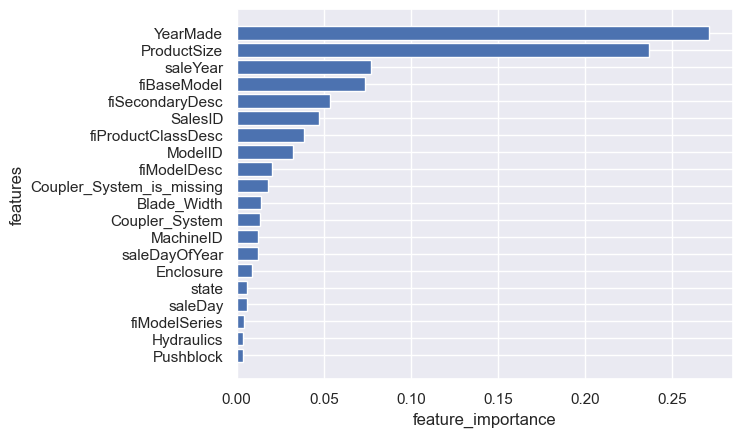

In [91]:
plot_features(X_train.columns, ideal_model.feature_importances_)